In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("full_data.csv")

In [3]:
data.head(20)
# male -1, female -0
# Yes-1 , No-0
# Govt_job-0 , Private-1 , Self_employed-2 , Children-3
# Urban-1 , Rural-0
# Unknown-0 , formerly_smoked-1 , never_smoked-2, smokes-3


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
data.shape

(4981, 11)

C:\Users\saish\AppData\Local\Temp\ipykernel_23032\3567123404.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt="1.2f")


<Axes: >

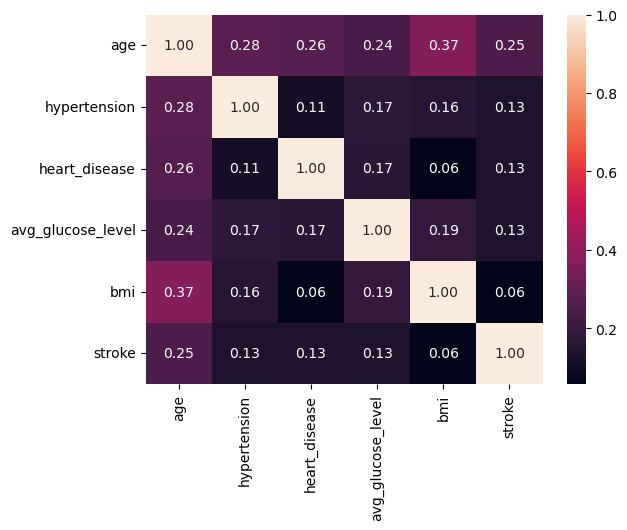

In [5]:
sns.heatmap(data.corr(),annot=True,fmt="1.2f")

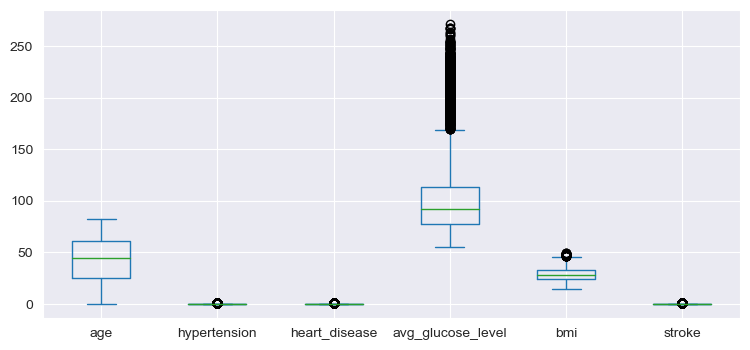

In [6]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9, 4)
data.plot(kind='box')
plt.show()

In [7]:
data['avg_glucose_level'].describe()

count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [8]:
data[data['avg_glucose_level']>113.860]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
4968,Female,78.0,1,1,Yes,Private,Rural,206.53,31.2,never smoked,0
4970,Female,70.0,0,1,Yes,Self-employed,Urban,240.69,30.9,smokes,0
4972,Male,72.0,0,1,Yes,Private,Rural,238.27,30.7,smokes,0
4975,Male,31.0,0,0,No,Private,Urban,215.07,32.7,smokes,0


In [9]:
# even though there are outliers in glucose level , they account to more than 1000 rows 
# so we cant delete them and the abnormal glucose level could be the cause of the stroke 
# so we keep the rows as it is 

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [11]:
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [12]:
#gender ,age ,hypertension ,heart_disease ,ever_married ,work_type ,Residence_type ,avg_glucose_level ,bmi ,smoking_status
data['work_type']=work_type            # Govt_job-0 , Private-1 , Self_employed-2 , Children-3
data['ever_married']=ever_married      # Yes-1 , No-0
data['Residence_type']=Residence_type  # Urban-1 , Rural-0
data['smoking_status']=smoking_status  # Unknown-0 , formerly_smoked-1 , never_smoked-2, smokes-3
data['gender']=gender                  # male -1, female -0


In [13]:
X=data.drop('stroke',axis=1)
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1


In [14]:
Y=data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101,stratify=Y)

In [16]:
X_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4348,1,21.0,0,0,0,1,0,92.87,28.4,3
301,0,25.0,0,0,0,1,0,66.30,27.2,2
3407,1,58.0,0,0,1,1,0,96.01,33.8,0
2433,0,53.0,0,0,1,0,0,87.62,33.7,3
1163,1,67.0,0,0,1,1,0,113.34,26.3,1


In [17]:
Y_train.head(5)

4348    0
301     0
3407    0
2433    0
1163    0
Name: stroke, dtype: int64

In [18]:
X_test.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2260,0,73.0,0,0,1,2,1,87.56,24.1,2
192,0,73.0,0,0,1,2,1,70.94,34.4,2
4245,0,17.0,0,0,0,1,0,79.62,21.6,2
1551,0,50.0,0,0,1,2,1,85.92,37.3,3
4462,1,42.0,0,0,1,0,1,58.35,24.3,2


In [19]:
Y_test.head(5)

2260    0
192     1
4245    0
1551    0
4462    0
Name: stroke, dtype: int64

In [20]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [22]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
Y_train.value_counts()

0    3786
1     198
Name: stroke, dtype: int64

In [23]:
X_train_std

array([[ 1.16807178, -0.98365808, -0.32518489, ..., -0.28815758,
        -0.01589207,  1.52739252],
       [-0.85611177, -0.80807183, -0.32518489, ..., -0.87965747,
        -0.19180499,  0.59150636],
       [ 1.16807178,  0.64051477, -0.32518489, ..., -0.21825507,
         0.77571609, -1.28026596],
       ...,
       [-0.85611177,  0.46492851, -0.32518489, ..., -0.26055277,
         0.01342675, -0.3443798 ],
       [ 1.16807178,  0.46492851, -0.32518489, ..., -0.39991255,
         0.37991201,  1.52739252],
       [ 1.16807178,  1.47454947, -0.32518489, ..., -1.00276603,
        -0.80750023,  1.52739252]])

In [24]:
X_test_std

array([[-0.85611177,  1.29896322, -0.32518489, ..., -0.40636851,
        -0.64624671,  0.59150636],
       [-0.85611177,  1.29896322, -0.32518489, ..., -0.77636204,
         0.86367256,  0.59150636],
       [-0.85611177, -1.15924434, -0.32518489, ..., -0.58312836,
        -1.01273197,  0.59150636],
       ...,
       [ 1.16807178, -0.06183025, -0.32518489, ...,  0.10832767,
         0.57048435, -0.3443798 ],
       [-0.85611177, -1.29093403, -0.32518489, ..., -0.62987844,
        -0.96875374,  0.59150636],
       [-0.85611177,  0.06985944, -0.32518489, ...,  0.10365266,
        -0.55829025,  1.52739252]])

<Axes: xlabel='stroke', ylabel='count'>

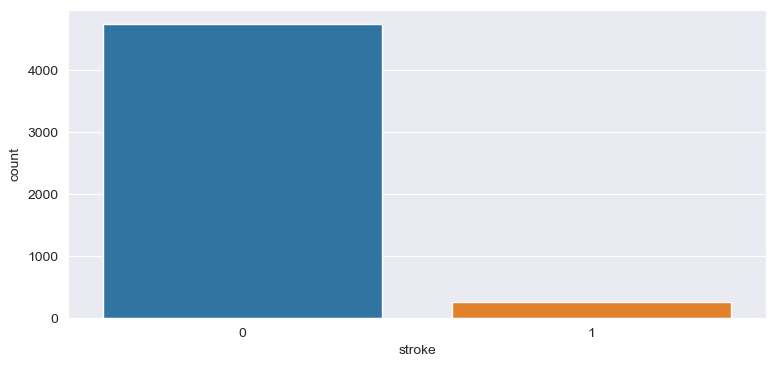

In [25]:
sns.countplot(x='stroke',data=data)

In [26]:
data.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [27]:
# the issue is data imbalance so there are many 0s as compared to the 1s in the 'stroke' column 
# so to resolve this issue we can undersampling or oversampling 

In [28]:
# here we use SMOTE - oversampling technique
from imblearn.combine import SMOTETomek

In [29]:
#now we will going to balance the sampling techniques.
st = SMOTETomek()

X_train_re,y_train_re = st.fit_resample(X_train_std,Y_train)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [31]:
rf.fit(X_train_re,y_train_re)

RandomForestClassifier()

In [32]:
Y_pred=rf.predict(X_test_std)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [33]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(Y_test,Y_pred)
ac_rf

0.9207622868605817

In [34]:
from sklearn.metrics import classification_report


In [35]:
# rf
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.9207622868605817
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       947
           1       0.23      0.24      0.23        50

    accuracy                           0.92       997
   macro avg       0.59      0.60      0.60       997
weighted avg       0.92      0.92      0.92       997



<Axes: >

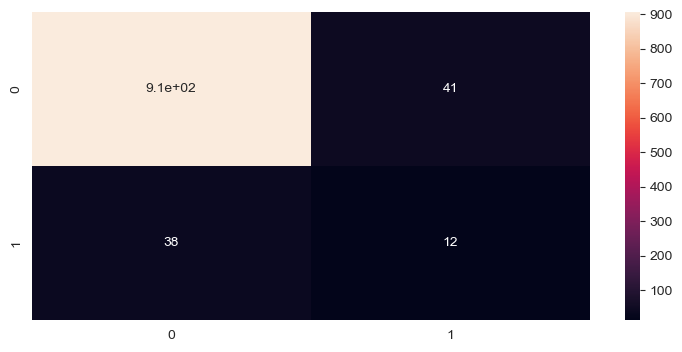

In [36]:
#rf
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

In [37]:
# now save the model 

import pickle as pkl 
path="brain_model.sav"

pkl.dump(rf,open(path,"wb"))

In [38]:
y1=rf.predict([[1 ,21.0 ,0 ,0 ,0 ,1 ,0 ,92.87 ,28.4 ,3]])
y1

array([0], dtype=int64)

In [39]:
y2=rf.predict([[1 ,21.0 ,0 ,0 ,0 ,0 ,0 ,92.87 ,28.4 ,3]])
y2

array([1], dtype=int64)

In [40]:
# male -1, female -0
# Yes-1 , No-0
# Govt_job-0 , Private-1 , Self_employed-2 , Children-3
# Urban-1 , Rural-0
# Unknown-0 , formerly_smoked-1 , never_smoked-2, smokes-3
